In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [2]:
# Load dataset
file_path = '[Dataset]_(Asuransi).csv'
ds = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
ds.head()


,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# Menghapus kolom yang tidak digunakan
dataset = ds.drop(columns=['Unnamed: 0'])

# Pembersihan data sex
dataset['insured sex'] = dataset['insured_sex_MALE'].apply(lambda x: 'Male' if x else 'Female')
dataset = dataset.drop(columns=['insured_sex_MALE', 'insured_sex_FEMALE'])

# Membersihkan occupation types
occupation_columns = [
    'insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
    'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
    'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners',
    'insured_occupation_machine-op-inspct', 'insured_occupation_other-service',
    'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty',
    'insured_occupation_protective-serv', 'insured_occupation_sales',
    'insured_occupation_tech-support', 'insured_occupation_transport-moving'
]

def get_occupation(row):
    for col in occupation_columns:
        if row[col] == 1:
            return col.replace('insured_occupation_', '')
    return 'Unknown'

dataset['occupation'] = dataset.apply(get_occupation, axis=1)
dataset['occupation'] = dataset['occupation'].replace('Unknown', dataset['occupation'].mode()[0])
dataset = dataset.drop(columns=occupation_columns)

# Membersihkan hobbies types
hobbies_columns = [
    'insured_hobbies_chess', 'insured_hobbies_cross-fit', 'insured_hobbies_other'
]

def get_hobbies(row):
    for col in hobbies_columns:
        if row[col] == 1:
            return col.replace('insured_hobbies_', '')
    return 'Unknown'

dataset['hobbies'] = dataset.apply(get_hobbies, axis=1)
dataset['hobbies'] = dataset['hobbies'].replace('Unknown', dataset['hobbies'].mode()[0])
dataset = dataset.drop(columns=hobbies_columns)

# Membersihkan incident type
it_columns = [
    'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
    'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft'
]

def get_it(row):
    for col in it_columns:
        if row[col] == 1:
            return col.replace('incident_type_', '')
    return 'Unknown'

dataset['incident type'] = dataset.apply(get_it, axis=1)
dataset = dataset.drop(columns=it_columns)

# Membersihkan collision types
collType_columns = [
    'collision_type_?', 'collision_type_Front Collision',
    'collision_type_Rear Collision', 'collision_type_Side Collision'
]

def get_collType(row):
    for col in collType_columns:
        if row[col] == 1:
            if col.split('_')[2] == '?':
                return col.replace('collision_type_?', 'other')
            return col.replace('collision_type_', '')
    return 'Unknown'

dataset['collision type'] = dataset.apply(get_collType, axis=1)
dataset['collision type'] = dataset['collision type'].replace('Unknown', dataset['collision type'].mode()[0])
dataset = dataset.drop(columns=collType_columns)

# Membersihkan incident severity group
is_columns = [
    'incident_severity_Major Damage', 'incident_severity_Minor Damage',
    'incident_severity_Total Loss', 'incident_severity_Trivial Damage'
]

def get_is(row):
    for col in is_columns:
        if row[col] == 1:
            return col.replace('incident_severity_', '')
    return 'Unknown'

dataset['incident severity'] = dataset.apply(get_is, axis=1)
dataset['incident severity'] = dataset['incident severity'].replace('Unknown', dataset['incident severity'].mode()[0])
dataset = dataset.drop(columns=is_columns)

# Membersihkan authorities contacted group
contacted_columns = [
    'authorities_contacted_Ambulance', 'authorities_contacted_Fire',
    'authorities_contacted_None', 'authorities_contacted_Other',
    'authorities_contacted_Police'
]

def get_contacted(row):
    for col in contacted_columns:
        if row[col] == 1:
            return col.replace('authorities_contacted_', '')
    return 'Unknown'

dataset['authorities contacted'] = dataset.apply(get_contacted, axis=1)
dataset['authorities contacted'] = dataset['authorities contacted'].replace('Unknown', dataset['authorities contacted'].mode()[0])
dataset = dataset.drop(columns=contacted_columns)

# Membersihkan age group
agegroup_columns = [
    'age_group_15-20', 'age_group_21-25',
    'age_group_26-30', 'age_group_31-35',
    'age_group_36-40', 'age_group_41-45',
    'age_group_46-50', 'age_group_51-55',
    'age_group_56-60', 'age_group_61-65'
]

def get_agegroup(row):
    for col in agegroup_columns:
        if row[col] == 1:
            return col.replace('age_group_', '')
    return 'Unknown'

dataset['age group'] = dataset.apply(get_agegroup, axis=1)
dataset['age group'] = dataset['age group'].replace('Unknown', dataset['age group'].mode()[0])
dataset = dataset.drop(columns=agegroup_columns)

# Membersihkan customer group
monthascustomergroup_columns = [
    'months_as_customer_groups_0-50', 'months_as_customer_groups_51-100',
    'months_as_customer_groups_101-150', 'months_as_customer_groups_151-200',
    'months_as_customer_groups_201-250', 'months_as_customer_groups_251-300',
    'months_as_customer_groups_301-350', 'months_as_customer_groups_351-400',
    'months_as_customer_groups_401-450', 'months_as_customer_groups_451-500'
]

def get_monthascustomergroup(row):
    for col in monthascustomergroup_columns:
        if row[col] == 1:
            return col.replace('months_as_customer_groups_', '')
    return 'Unknown'

dataset['months as customer groups'] = dataset.apply(get_monthascustomergroup, axis=1)
dataset['months as customer groups'] = dataset['months as customer groups'].replace('Unknown', dataset['months as customer groups'].mode()[0])
dataset = dataset.drop(columns=monthascustomergroup_columns)

# Membersihkan policy group
policyannualpremiumgroup_columns = [
    'policy_annual_premium_groups_high', 'policy_annual_premium_groups_low',
    'policy_annual_premium_groups_medium', 'policy_annual_premium_groups_very high',
    'policy_annual_premium_groups_very low'
]

def get_policyannualpremiumgroup(row):
    for col in policyannualpremiumgroup_columns:
        if row[col] == 1:
            return col.replace('policy_annual_premium_groups_', '')
    return 'Unknown'

dataset['policy annual premium group'] = dataset.apply(get_policyannualpremiumgroup, axis=1)
dataset['policy annual premium group'] = dataset['policy annual premium group'].replace('Unknown', dataset['policy annual premium group'].mode()[0])
dataset = dataset.drop(columns=policyannualpremiumgroup_columns)

dataset.head()


,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured sex,occupation,hobbies,incident type,collision type,incident severity,authorities contacted,age group,months as customer groups,policy annual premium group
0,53300,0,5,1,2,71610,1,Male,craft-repair,other,Single Vehicle Collision,Side Collision,Major Damage,Police,46-50,301-350,medium
1,0,0,8,1,0,5070,1,Male,machine-op-inspct,other,Vehicle Theft,other,Minor Damage,Police,41-45,201-250,medium
2,35100,0,7,3,3,34650,0,Female,sales,other,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,26-30,101-150,medium
3,48900,-62400,5,1,2,63400,1,Female,armed-forces,other,Single Vehicle Collision,Front Collision,Major Damage,Police,41-45,251-300,medium
4,66000,-46000,20,1,1,6500,0,Male,sales,other,Vehicle Theft,other,Minor Damage,None,41-45,201-250,high


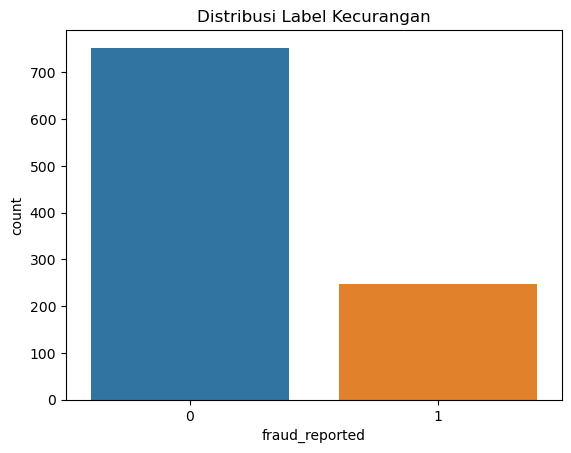

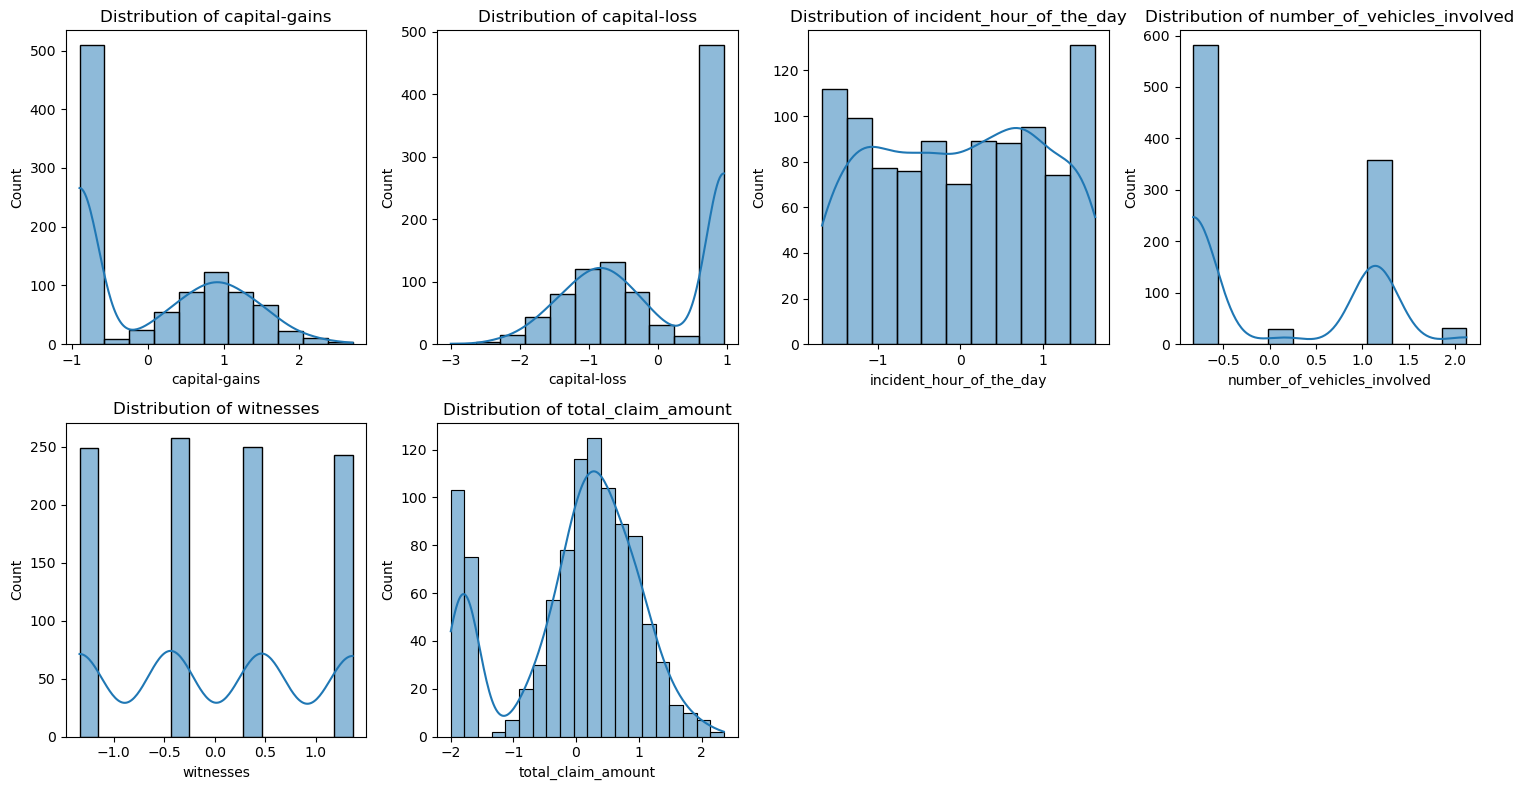

Unnamed: 0                                0
capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
                                         ..
policy_annual_premium_groups_high         0
policy_annual_premium_groups_low          0
policy_annual_premium_groups_medium       0
policy_annual_premium_groups_very high    0
policy_annual_premium_groups_very low     0
Length: 69, dtype: int64

In [4]:
# Periksa nilai yang hilang.
missing_values = ds.isnull().sum()

# Normalisasi fitur numerik
numerical_features = ['capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 
                      'witnesses', 'total_claim_amount']

scaler = StandardScaler()
ds[numerical_features] = scaler.fit_transform(ds[numerical_features])

# pembagi data menjadi set pelatihan dan pengujian.
X = ds.drop(columns=['Unnamed: 0', 'fraud_reported'])
y = ds['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualisasi distribusi target
sns.countplot(x='fraud_reported', data=ds)
plt.title('Distribusi Label Kecurangan')
plt.show()

# Data Distribution Analysis
num_features = len(numerical_features)
num_rows = (num_features // 4) + 1  # Adjusting number of rows based on the number of numerical features
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

missing_values


In [5]:
# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Confusion Matrix: \n{conf_matrix}") 
print(f"Accuracy\t: {accuracy}") 
print(f"Precision\t: {precision}")
print(f"Recall\t\t: {recall}")


Confusion Matrix: 
[[124  21]
 [ 29  26]]
Accuracy	: 0.75
Precision	: 0.5531914893617021
Recall		: 0.4727272727272727


In [6]:
# Pisahkan fitur dan target
X = dataset.drop(columns=['fraud_reported'])
y = dataset['fraud_reported']

# Konversi kolom kategorikal ke numerik
X = pd.get_dummies(X)

# Pisahkan data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan akurasi
print(f'Akurasi model\t: {accuracy * 100:.2f}%')

# Pengecekan test case merupakan penipuan atau tidak menggunakan sample dataset
test_case = X_test.iloc[[1]]
prediction = model.predict(test_case)

# Tampilkan hasil prediksi untuk test case
if prediction[0] == 0:
    fraud = 'Tidak Penipuan Asuransi'
else:
    fraud = 'Penipuan Asuransi'
print(f'Klaim\t\t: {fraud}')


Akurasi model	: 72.50%
Klaim		: Tidak Penipuan Asuransi
